# Tensorflow Practice

In [19]:
# installing packages into .venv
!pip3 install tensorflow pandas numpy matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/af/f3/fb27b3b902fc759bbca3f9d0336c48069c3022e57552c4b0095d997c7ea8/matplotlib-3.8.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached matplotlib-3.8.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/2c/8e/656f8e7cd316aa68d9824744773e90dbd71f847429d10c82001e927480a2/contourpy-1.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached contourpy-1.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.9 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/49/ba/ebe5599a

In [4]:
import tensorflow as tf
import pandas as pd

### Loading in dataset

In [58]:
mnist = tf.keras.datasets.mnist

### Splitting test and train

In [10]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 2s 0us/step


In [59]:
print(y_test)

[7 2 1 ... 4 5 6]


In [60]:
x_train.shape

(60000, 28, 28)

### Visualising the first image

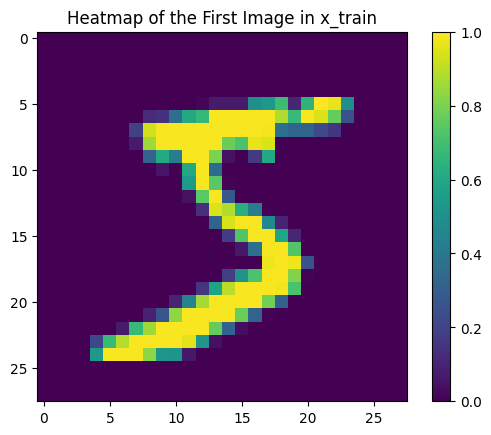

In [61]:
import matplotlib.pyplot as plt

# Select the first image from the x_train dataset
image = x_train[0]

# Plot the image as a heatmap
plt.imshow(image)
plt.colorbar()
plt.title('Heatmap of the First Image in x_train')
plt.show()

***
### Building neural net
1. Initialize a Sequential model
1. Flatten layer that converts 28x28 pixel images into a 1D array
1. Add dense layer with 128 neurons and a ReLU activation function
1. Add dropout layer that randomly sets 20% of the input units to 0 during training to prevent overfitting
1. Create output layer with 10 neurons, one for each digit

In [62]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

### Running optimiser

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Define a callback to stop training when accuracy stops improving

In [64]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=3,
    mode='max',
    restore_best_weights=True)

### Training model and storing history

In [69]:
n_epochs = 10
history = model.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])
model.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1433 - accuracy: 0.9579 - val_loss: 0.1086 - val_accuracy: 0.9670
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1072 - accuracy: 0.9691 - val_loss: 0.0881 - val_accuracy: 0.9735
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0831 - accuracy: 0.9754 - val_loss: 0.0814 - val_accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0706 - accuracy: 0.9789 - val_loss: 0.0667 - val_accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9804 - val_loss: 0.0801 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0574 - accuracy: 0.9823 - val_loss: 0.0733 - val_accuracy: 0.9778
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0744 - accuracy: 0.9780 - val_loss: 0.0767 - val_accuracy:

### Evaluating model

In [66]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0678 - accuracy: 0.9800 - 264ms/epoch - 844us/step


[0.06776423007249832, 0.9800000190734863]

### Visualising model performance

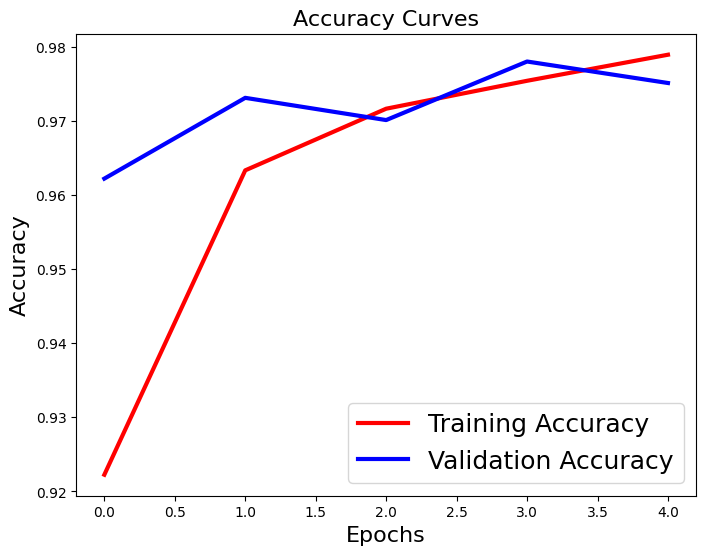

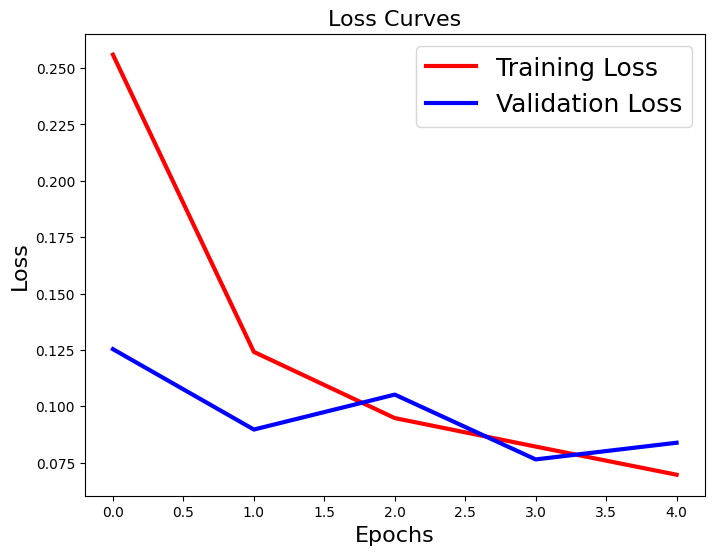

In [68]:
import matplotlib.pyplot as plt

# Plot the training accuracy
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

# Plot the training loss
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt


In [33]:

# Assume 'predictions' is an array of predicted probabilities for each class
# And 'labels' is an array of the true labels



313/313 [==============================] - 0s 855us/step


### Creating confusion matrix from predictions

In [78]:
predictions = model.predict(x_test)
labels = y_test

confusion_matrix = np.zeros((10, 10))
confusion_matrix

for i in range(len(labels)):
    true_label = labels[i]
    predicted_label = np.argmax(predictions[i])
    confusion_matrix[true_label, predicted_label] += 1


313/313 [==============================] - 0s 883us/step


In [74]:
confusion_matrix

array([[9.700e+02, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00],
       [0.000e+00, 1.124e+03, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 4.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00, 1.014e+03, 5.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 5.000e+00, 2.000e+00, 1.000e+00],
       [0.000e+00, 0.000e+00, 5.000e+00, 9.950e+02, 0.000e+00, 6.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 9.600e+02, 0.000e+00,
        5.000e+00, 1.000e+00, 0.000e+00, 1.300e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 8.750e+02,
        2.000e+00, 1.000e+00, 6.000e+00, 3.000e+00],
       [2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 4.000e+00,
        9.430e+02, 0.000e+00, 5.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+00, 6.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.007e+03, 3.000e+

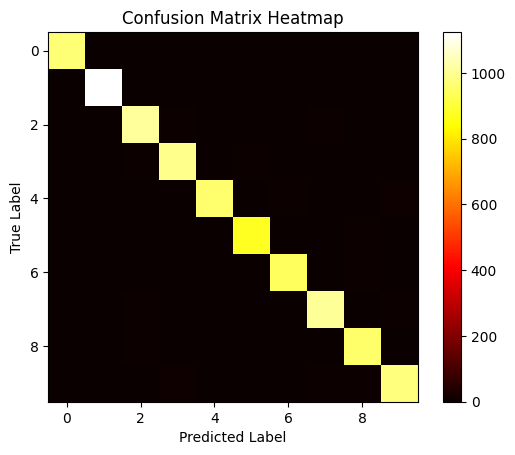

In [79]:

# Plotting
plt.imshow(confusion_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()